# Загрузка данных

Данные взяты с сайта kaggle
[пользователи Netflix](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lesson 14/netflix_users_data.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


# Приведение столбцов к стилю camel_case

In [8]:
print(df.columns.tolist())

['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date', 'Last Payment Date', 'Country', 'Age', 'Gender', 'Device', 'Plan Duration']


In [9]:
import re

def to_camel_case(snake_str):
    # Replace hyphens and spaces with a single space to treat them as word separators
    s = snake_str.replace('-', ' ').replace(' ', ' ')
    # Capitalize the first letter of each word and join them without spaces
    s = ''.join(word.capitalize() for word in s.split())
    # Lowercase the first letter of the entire string, unless it's empty
    return s[0].lower() + s[1:] if s else s

df.columns = [to_camel_case(col) for col in df.columns]

In [10]:
print(df.columns.tolist())

['userId', 'subscriptionType', 'monthlyRevenue', 'joinDate', 'lastPaymentDate', 'country', 'age', 'gender', 'device', 'planDuration']


# Приведение типов данных

In [11]:
#привести дату к типу datetime

In [12]:
df['joinDate'] = pd.to_datetime(df['joinDate'], format='%d-%m-%y')
df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'], format='%d-%m-%y')

In [13]:
print(df.columns)

Index(['userId', 'subscriptionType', 'monthlyRevenue', 'joinDate',
       'lastPaymentDate', 'country', 'age', 'gender', 'device',
       'planDuration'],
      dtype='object')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   userId            2500 non-null   int64         
 1   subscriptionType  2500 non-null   object        
 2   monthlyRevenue    2500 non-null   int64         
 3   joinDate          2500 non-null   datetime64[ns]
 4   lastPaymentDate   2500 non-null   datetime64[ns]
 5   country           2500 non-null   object        
 6   age               2500 non-null   int64         
 7   gender            2500 non-null   object        
 8   device            2500 non-null   object        
 9   planDuration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


# Поиск дублей и пропусков в данных

In [15]:
print(f"Количество дубликатов: {df.duplicated().sum()}")
print("Количество пропущенных значений по столбцам:")
print(df.isnull().sum())

Количество дубликатов: 0
Количество пропущенных значений по столбцам:
userId              0
subscriptionType    0
monthlyRevenue      0
joinDate            0
lastPaymentDate     0
country             0
age                 0
gender              0
device              0
planDuration        0
dtype: int64


# Исследовательский анализ данных

In [16]:
df

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month


In [17]:
# сколько уникальных пользователей?

In [18]:
unique_customers = df['userId'].nunique()
print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных клиентов: 2500


In [19]:
# изучить возраст пользователей (визуализировать)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Убедимся, что возраст — числовой тип
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Удалим строки с отсутствующим возрастом
df = df.dropna(subset=['age'])


# Проверим основные статистики
#print("Основные статистики по возрасту:")
#print(df['age'].describe())

In [21]:
metrics = {
    'Средний возраст': df['age'].mean(),
    'Медиана возраста': df['age'].median(),
    'Стандартное отклонение': df['age'].std(),
    'Минимальный возраст': df['age'].min(),
    'Максимальный возраст': df['age'].max(),
    '25-й перцентиль': df['age'].quantile(0.25),
    '75-й перцентиль': df['age'].quantile(0.75),
    'Количество пользователей': len(df)
}
for key, value in metrics.items():
    print(f"{key}: {value:.1f}")

Средний возраст: 38.8
Медиана возраста: 39.0
Стандартное отклонение: 7.2
Минимальный возраст: 26.0
Максимальный возраст: 51.0
25-й перцентиль: 32.0
75-й перцентиль: 45.0
Количество пользователей: 2500.0


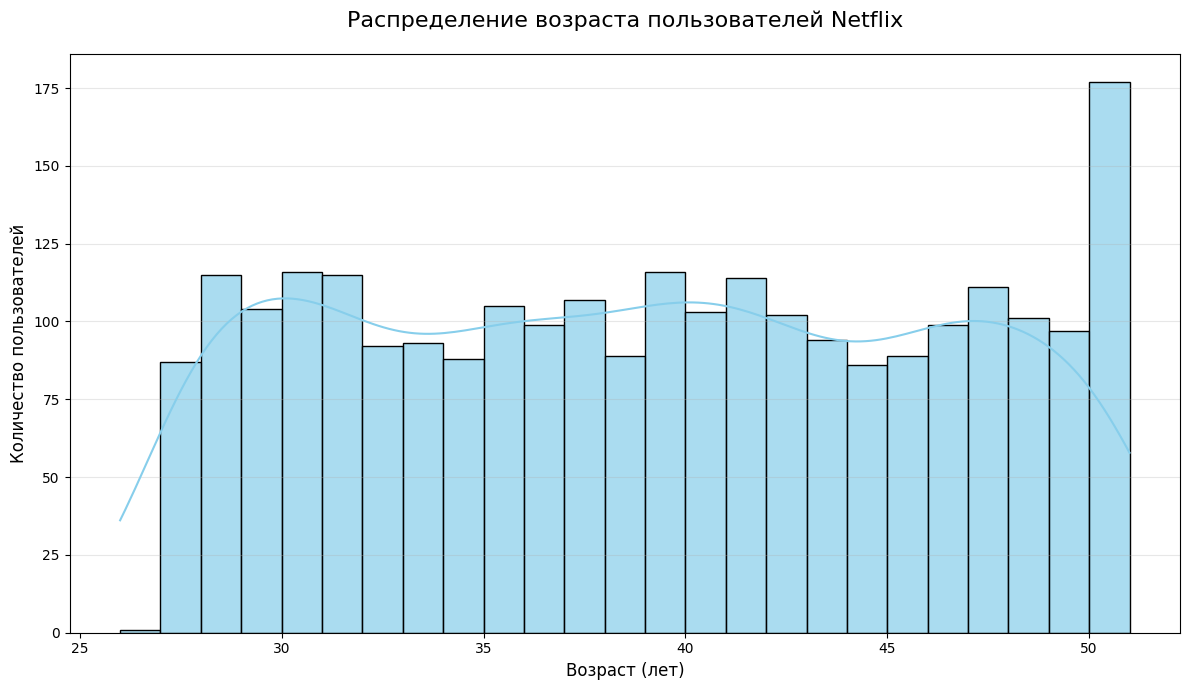

In [22]:
# Гистограмма с KDE (основной график)

plt.figure(figsize=(12, 7))
sns.histplot(
    data=df,
    x='age',
    bins=25,
    kde=True,
    color='skyblue',
    alpha=0.7
)
plt.title('Распределение возраста пользователей Netflix', fontsize=16, pad=20)
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [23]:
# изучить пол пользователей (визуализировать)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# Проверим уникальные значения в колонке 'gender'
print("Уникальные значения в колонке 'gender':")
print(df['gender'].value_counts())


# Приведём значения к единому формату (если нужно)
# Например, объединим 'M', 'Male' → 'Мужской'; 'F', 'Female' → 'Женский'
gender_mapping = {
    'M': 'Мужской',
    'Male': 'Мужской',
    'F': 'Женский',
    'Female': 'Женский'
}
df['gender'] = df['gender'].map(gender_mapping).fillna(df['gender'])


# Уберём пропуски
df = df.dropna(subset=['gender'])

Уникальные значения в колонке 'gender':
gender
Female    1257
Male      1243
Name: count, dtype: int64


In [25]:
#Считаем количество пользователей по полу
gender_counts = df['gender'].value_counts()
gender_percentages = df['gender'].value_counts(normalize=True) * 100


print("Количество пользователей по полу:")
print(gender_counts)
print("\nДоли по полу (в %):")
print(gender_percentages.round(1))

Количество пользователей по полу:
gender
Женский    1257
Мужской    1243
Name: count, dtype: int64

Доли по полу (в %):
gender
Женский    50.3
Мужской    49.7
Name: proportion, dtype: float64


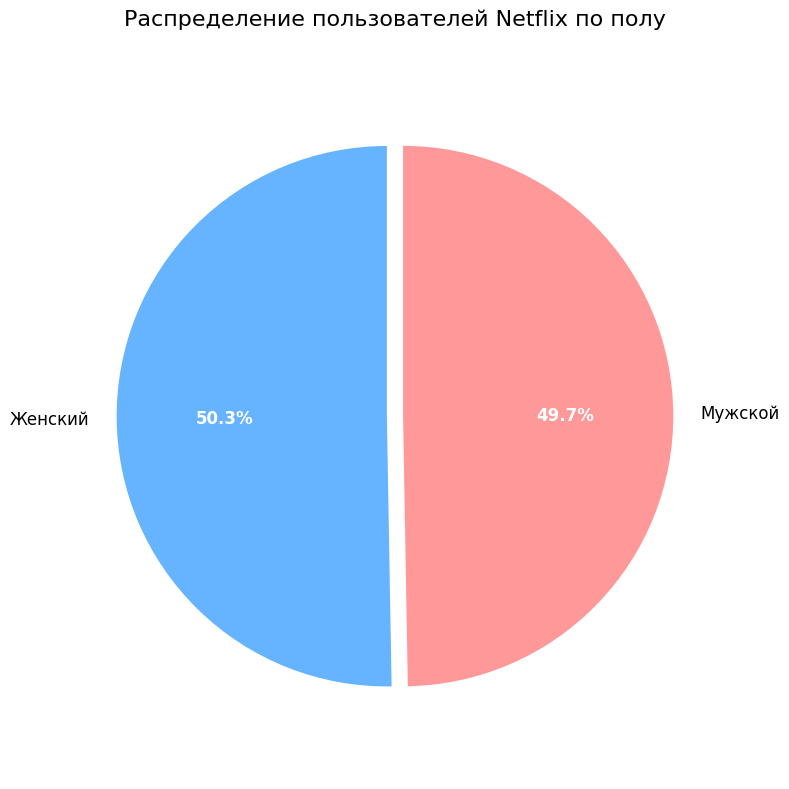

In [26]:
#Построение круговой диаграммы
plt.figure(figsize=(8, 8))


# Параметры диаграммы
colors = ['#66b3ff', '#ff9999']  # Голубой для мужского, розовый для женского
explode = (0.03, 0.03)  # Небольшой «вылет» сегментов


# Строим диаграмму
wedges, texts, autotexts = plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90,
    textprops={'fontsize': 12}
)

# Стилизуем текст процентов
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')


plt.title('Распределение пользователей Netflix по полу', fontsize=16, pad=20)
plt.axis('equal')  # Чтобы диаграмма была идеально круглой
plt.tight_layout()
plt.show()

In [27]:
# изучить девайсы пользователей (визуализировать)

/tmp/ipython-input-2911171309.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


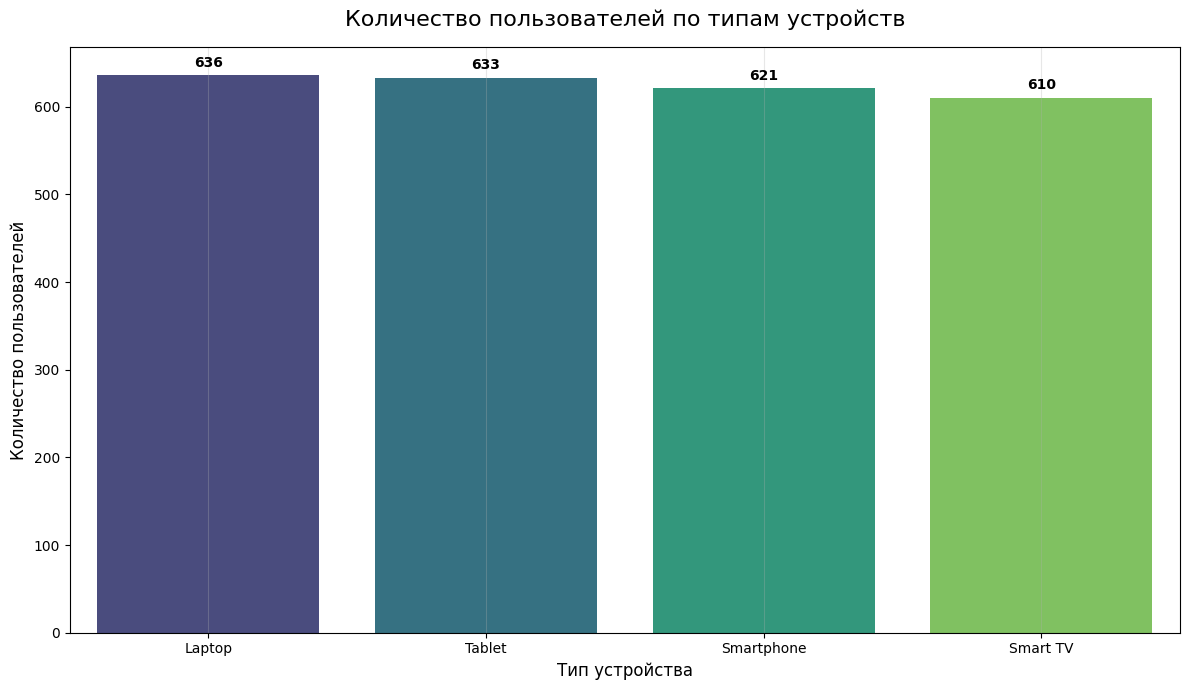

device_clean
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64


In [28]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#df['device_clean'] = df['device'].map(device_mapping).fillna(df['device'].str.capitalize())
df['device_clean'] = df['device'].fillna(df['device'].str.capitalize())

# Считаем итоговые группы
device_counts = df['device_clean'].value_counts()

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    y=device_counts.values,
    x=device_counts.index,
    palette='viridis'
)

# Вручную добавляем метки на каждый столбец
for i, value in enumerate(device_counts.values):
    ax.text(
        i,                      # позиция по оси X (индекс столбца)
        value + max(device_counts.values)*0.01,  # выше верха столбца (с отступом 1% от макс. высоты)
        f'{value}',             # текст (значение)
        ha='center',           # выравнивание по горизонтали
        va='bottom',          # выравнивание по вертикали
        fontsize=10,
        color='black',
        fontweight='bold'
    )

plt.title('Количество пользователей по типам устройств', fontsize=16, pad=15)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xlabel('Тип устройства', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print (device_counts)

In [29]:
# изучить тип подписки пользователей (визуализировать)

Распределение типов подписок:
subscriptionType
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64


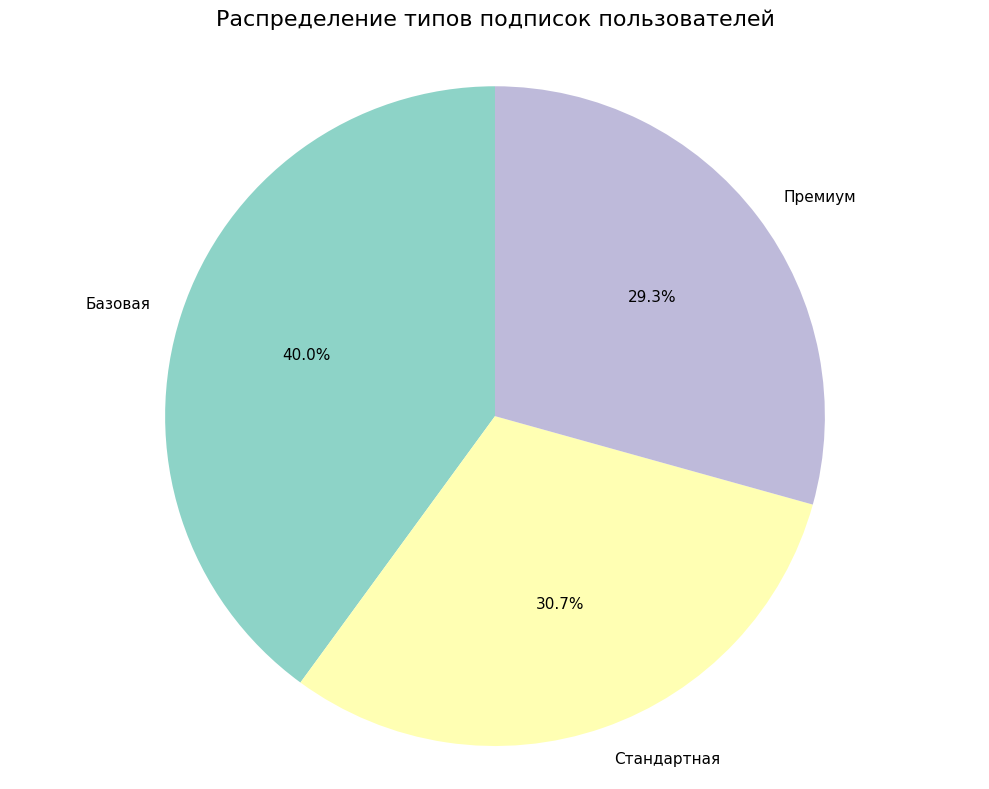

In [30]:
# Подготовка данных

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Проверим уникальные значения и их количество
print("Распределение типов подписок:")
print(df['subscriptionType'].value_counts())


# Приведём к единому регистру и нормализуем названия (если нужно)
df['subscriptionType'] = df['subscriptionType'].str.strip().str.lower()


subscription_mapping = {
    'basic': 'Базовая',
    'standard': 'Стандартная',
    'premium': 'Премиум',
    'family': 'Семейная',
    'student': 'Студенческая'
}
df['subscription_clean'] = df['subscriptionType'].map(subscription_mapping).fillna(df['subscriptionType'].str.capitalize())


# Считаем итоговые группы
subscription_counts = df['subscription_clean'].value_counts()
# Круговая диаграмма (основной вариант)

plt.figure(figsize=(10, 8))


colors = plt.cm.Set3.colors  # Автоматическая палитра


wedges, texts, autotexts = plt.pie(
    subscription_counts,
    labels=subscription_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 11}
)

plt.title('Распределение типов подписок пользователей', fontsize=16, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [31]:
# изучить локацию пользователей (визуализировать)

/tmp/ipython-input-1530019280.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


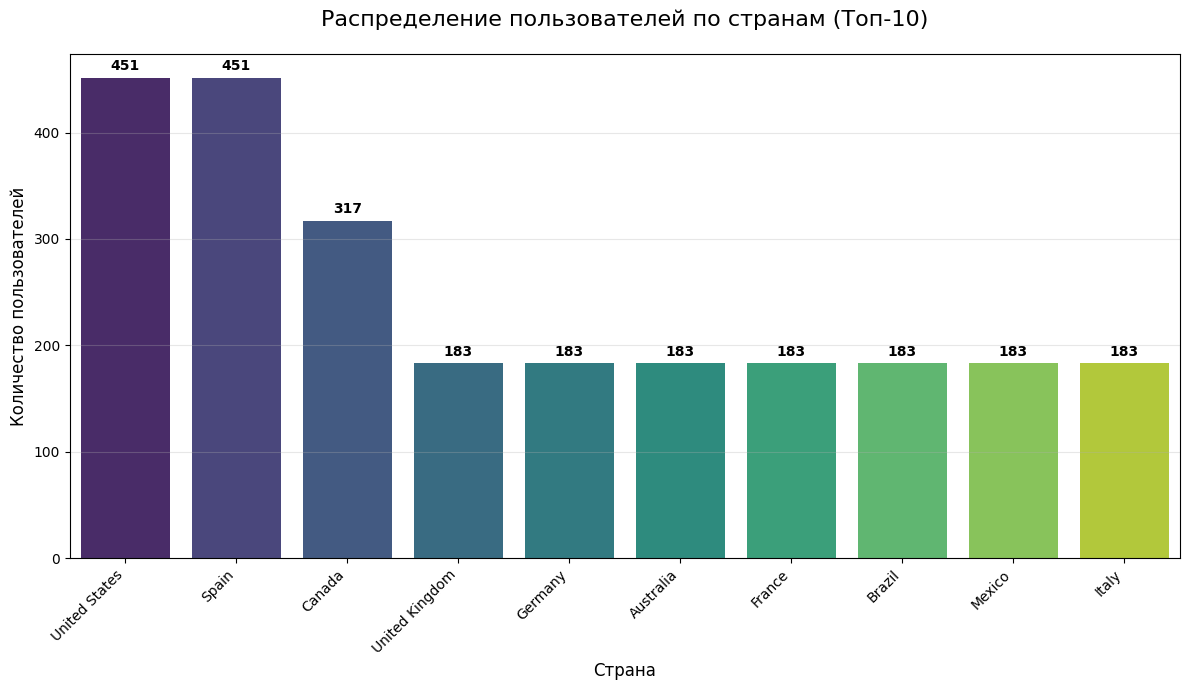

country
United States     451
Spain             451
Canada            317
United Kingdom    183
Germany           183
Australia         183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Считаем количество пользователей по странам
country_counts = df['country'].value_counts()

# Выбираем топ-10 стран для визуализации (можно изменить количество)
top_countries = country_counts.head(10)

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')

# Добавляем количество пользователей на каждый столбец
for i, value in enumerate(top_countries.values):
    ax.text(
        i,                      # позиция по оси X (индекс столбца)
        value + max(top_countries.values)*0.01,  # выше верха столбца (с отступом 1% от макс. высоты)
        f'{value}',             # текст (значение)
        ha='center',           # выравнивание по горизонтали
        va='bottom',          # выравнивание по вертикали
        fontsize=10,
        color='black',
        fontweight='bold'
    )

plt.title('Распределение пользователей по странам (Топ-10)', fontsize=16, pad=20)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45, ha='right') # Поворот меток для лучшей читаемости
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print (country_counts)

In [33]:
# изучть динамику привлечения пользователей (Join Date)

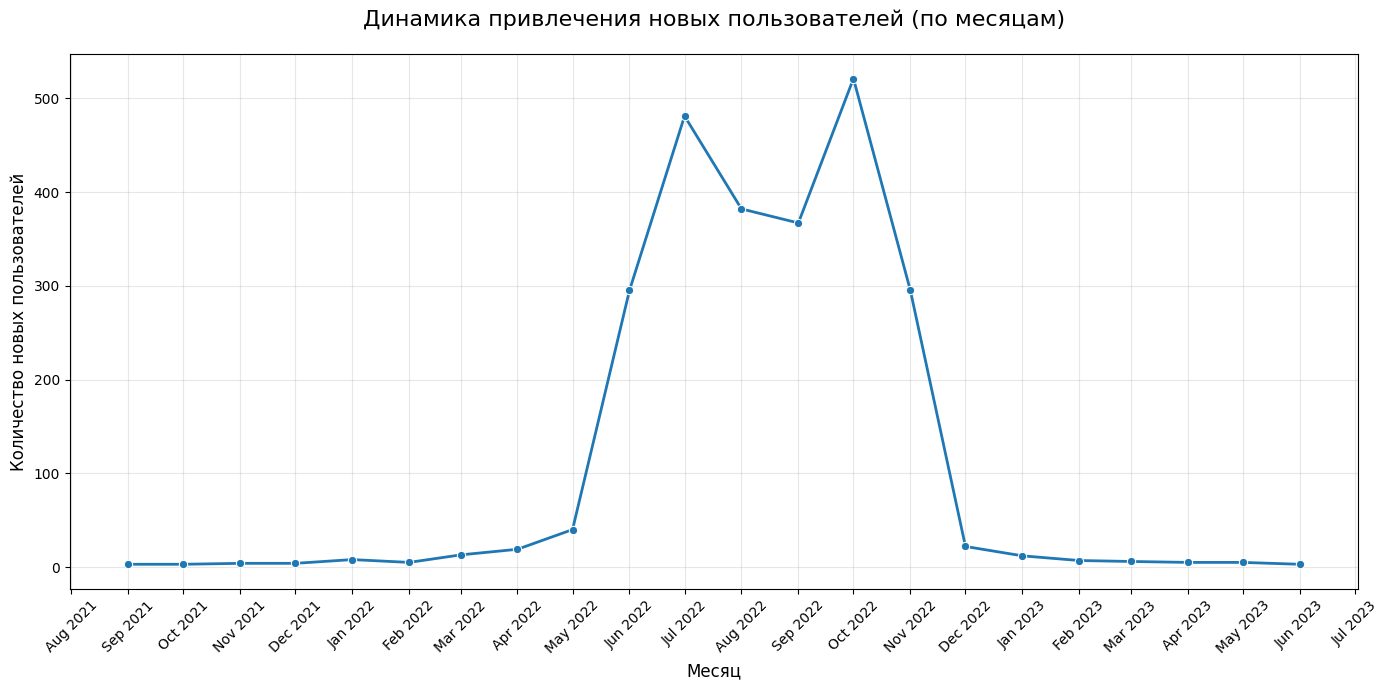

In [34]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Убедимся, что joinDate имеет тип datetime
df['joinDate'] = pd.to_datetime(df['joinDate'])

# Сортируем по дате для корректного отображения динамики
df = df.sort_values('joinDate')

# Группируем по месяцу и считаем количество новых пользователей
users_per_month = df.groupby(
    df['joinDate'].dt.to_period('M')
).size().reset_index(name='count')

# Преобразуем Period в Timestamp для корректного построения графика
users_per_month['joinDate'] = users_per_month['joinDate'].dt.to_timestamp()
#2. Построение линейного графика

plt.figure(figsize=(14, 7))

sns.lineplot(
    data=users_per_month,
    x='joinDate',
    y='count',
    marker='o',
    linewidth=2,
    markersize=6
)

plt.title('Динамика привлечения новых пользователей (по месяцам)', fontsize=16, pad=20)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество новых пользователей', fontsize=12)


# Форматирование оси X (месяцы)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)

# Сетка для удобства чтения
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [35]:
# изучть динамику выручки сервиса (накопленное Monthly Revenue по месяцу с момента Join Date до момента Last Payment Date)

In [36]:
import pandas as pd
import numpy as np

# Приводим даты к datetime
df['joinDate'] = pd.to_datetime(df['joinDate'])
df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'])

# Рассчитываем количество полных месяцев между joinDate и lastPaymentDate
# (сколько месяцев пользователь реально платил)
df['active_months'] = (
    (df['lastPaymentDate'].dt.to_period('M') - df['joinDate'].dt.to_period('M'))
    .apply(lambda x: x.n)
)

# Если lastPaymentDate < joinDate (ошибка данных) — ставим 0
df['active_months'] = np.where(df['active_months'] < 0, 0, df['active_months'])

# Для текущих пользователей (ещё не ушли) — считаем от joinDate до текущей даты
current_date = pd.Timestamp.today()
df['is_active'] = df['lastPaymentDate'] >= current_date  # True, если пользователь ещё платит

df.loc[~df['is_active'], 'active_months'] = df['active_months']  # Уже ушедшие
df.loc[df['is_active'], 'active_months'] = (
    (current_date.to_period('M') - df['joinDate'].dt.to_period('M')).apply(lambda x: x.n)
)

In [37]:
#3. Динамика накопленной выручки по месяцам
# Создаём временной ряд: для каждого месяца считаем добавленную выручку
revenue_timeline = []

for _, user in df.iterrows():
    start_month = user['joinDate'].to_period('M')
    end_month = (user['joinDate'] + pd.DateOffset(months=user['active_months'])).to_period('M')

    # Для каждого активного месяца пользователя добавляем его ежемесячный платёж
    for month in pd.period_range(start_month, end_month, freq='M'):
        revenue_timeline.append({
            'month': month.to_timestamp(),
            'revenue': user['monthlyRevenue']
        })

# Собираем в DataFrame и группируем по месяцу
revenue_df = pd.DataFrame(revenue_timeline)
revenue_monthly = revenue_df.groupby('month')['revenue'].sum().reset_index()

# Накопительная сумма по месяцам
revenue_monthly['cumulative'] = revenue_monthly['revenue'].cumsum()
print(revenue_monthly['cumulative'] )

0         39
1        117
2        241
3        417
4        691
5       1027
6       1524
7       2262
8       3505
9       8446
10     19399
11     35083
12     55326
13     82134
14    112664
15    143475
16    174440
17    205503
18    236635
19    267819
20    299055
21    330326
22    350768
Name: cumulative, dtype: int64


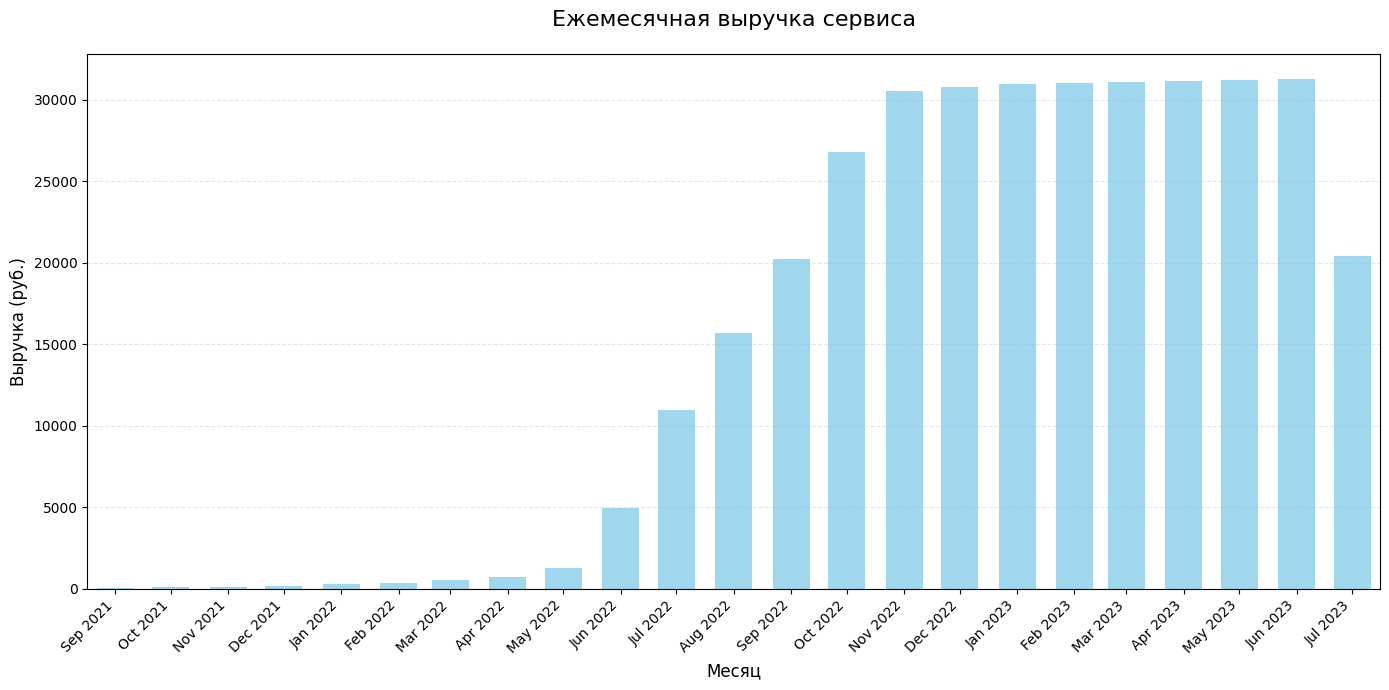

        month  revenue  cumulative
0  2021-09-01       39          39
1  2021-10-01       78         117
2  2021-11-01      124         241
3  2021-12-01      176         417
4  2022-01-01      274         691
5  2022-02-01      336        1027
6  2022-03-01      497        1524
7  2022-04-01      738        2262
8  2022-05-01     1243        3505
9  2022-06-01     4941        8446
10 2022-07-01    10953       19399
11 2022-08-01    15684       35083
12 2022-09-01    20243       55326
13 2022-10-01    26808       82134
14 2022-11-01    30530      112664
15 2022-12-01    30811      143475
16 2023-01-01    30965      174440
17 2023-02-01    31063      205503
18 2023-03-01    31132      236635
19 2023-04-01    31184      267819
20 2023-05-01    31236      299055
21 2023-06-01    31271      330326
22 2023-07-01    20442      350768


In [38]:

#Визуализация динамики выручки
#График 1: Ежемесячная выручка
plt.figure(figsize=(14, 7))

# Строим бар-график
bars = plt.bar(
    revenue_monthly['month'],
    revenue_monthly['revenue'],
    color='skyblue',
    alpha=0.8,
    width=20  # Ширина столбцов (в днях)
)

plt.title('Ежемесячная выручка сервиса', fontsize=16, pad=20)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Выручка (руб.)', fontsize=12)


# 1. Явно задаём локатор для основных делений (каждый месяц)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())


# 2. Форматируем метки (месяц и год)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))


# 3. Поворот меток для читаемости
plt.xticks(rotation=45, ha='right')


# 4. Добавляем сетку по оси Y (для ориентации)
plt.grid(axis='y', alpha=0.3, linestyle='--')


# 5. Ограничиваем диапазон оси X (чтобы не было пустых краев)
plt.xlim(
    revenue_monthly['month'].min() - pd.Timedelta(days=15),
    revenue_monthly['month'].max() + pd.Timedelta(days=15)
)

# 6. Улучшаем макет
plt.tight_layout()
plt.show()

print (revenue_monthly)

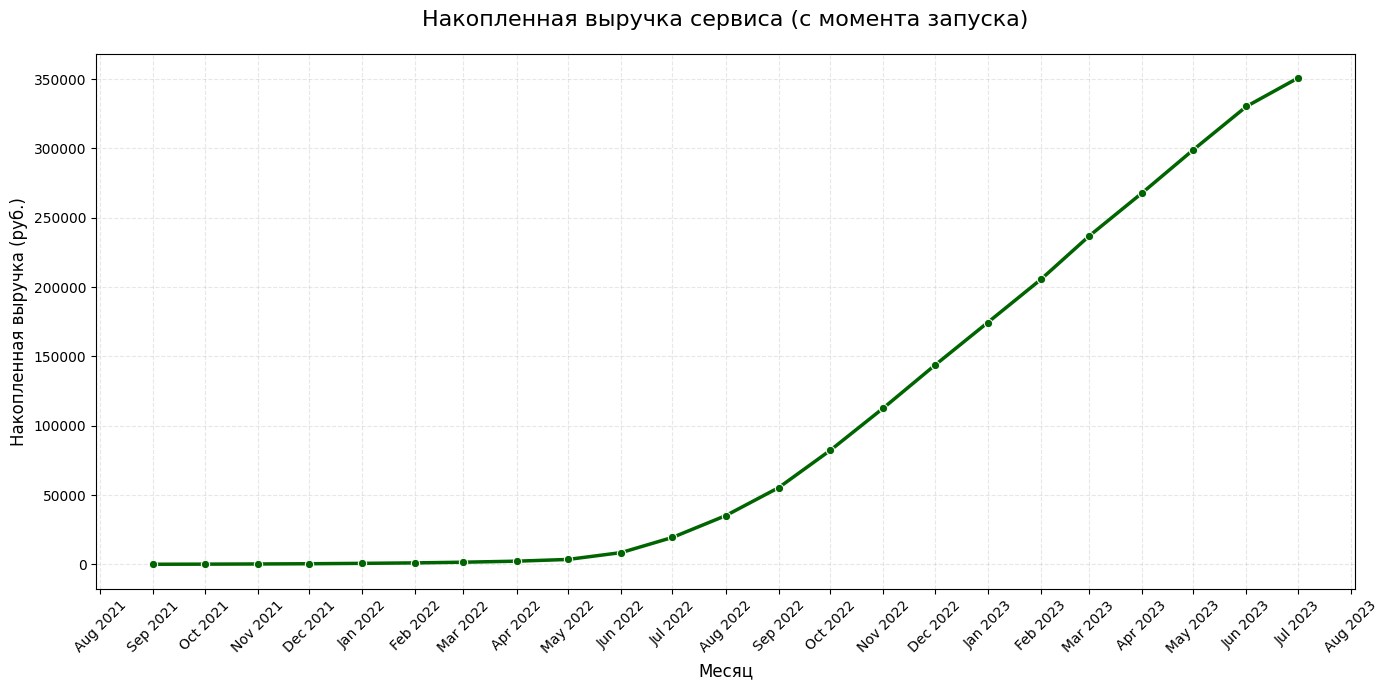

In [39]:
#График 2: Накопительная выручка

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=revenue_monthly,
    x='month',
    y='cumulative',
    marker='o',
    linewidth=2.5,
    color='darkgreen'
)
plt.title('Накопленная выручка сервиса (с момента запуска)', fontsize=16, pad=20)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Накопленная выручка (руб.)', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [40]:
#Ключевые метрики для отчёта
print("Анализ выручки сервиса:")
print(f"- Общая накопленная выручка: {revenue_monthly['cumulative'].iloc[-1]:,.2f} руб.")
print(f"- Средняя ежемесячная выручка: {revenue_monthly['revenue'].mean():,.2f} руб.")
print(f"- Максимальный месяц по выручке: {revenue_monthly.loc[revenue_monthly['revenue'].idxmax(), 'month'].strftime('%b %Y')} ({revenue_monthly['revenue'].max():,.2f} руб.)")
print(f"- Минимальный месяц по выручке: {revenue_monthly.loc[revenue_monthly['revenue'].idxmin(), 'month'].strftime('%b %Y')} ({revenue_monthly['revenue'].min():,.2f} руб.)")

# Доля активных пользователей в текущей выручке
active_users_count = df[df['is_active']].shape[0]
total_users = df.shape[0]
print(f"- Доля активных пользователей: {active_users_count/total_users:.1%} ({active_users_count}/{total_users})")

Анализ выручки сервиса:
- Общая накопленная выручка: 350,768.00 руб.
- Средняя ежемесячная выручка: 15,250.78 руб.
- Максимальный месяц по выручке: Jun 2023 (31,271.00 руб.)
- Минимальный месяц по выручке: Sep 2021 (39.00 руб.)
- Доля активных пользователей: 0.0% (0/2500)


In [41]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Определяем возрастные группы (корзины)
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']


# Создаём колонку с возрастной группой
df['age_group'] = pd.cut(
    df['age'],
    bins=bins,
    labels=labels,
    right=False  # интервал [left, right)
)

In [43]:
#2. Расчёт платёжеспособности по группам
#Ключевые метрики:

#Средняя месячная выручка на пользователя в группе.

#Общая накопленная выручка от группы (с учётом длительности подписки).

#Доля группы в общей выручке сервиса.

# Рассчитываем накопленную выручку на пользователя (как в предыдущем анализе)
df['active_months'] = (
    (df['lastPaymentDate'].dt.to_period('M') - df['joinDate'].dt.to_period('M'))
    .apply(lambda x: x.n)
)
df['active_months'] = np.where(df['active_months'] < 0, 0, df['active_months'])


current_date = pd.Timestamp.today()
df['is_active'] = df['lastPaymentDate'] >= current_date
df.loc[df['is_active'], 'active_months'] = (
    (current_date.to_period('M') - df['joinDate'].dt.to_period('M')).apply(lambda x: x.n)
)

df['cumulative_revenue'] = df['monthlyRevenue'] * df['active_months']


# Группируем по возрастной корзине и считаем метрики
age_analysis = df.groupby('age_group').agg({
    'userId': 'count',  # количество пользователей
    'monthlyRevenue': 'mean',  # средняя месячная выручка
    'cumulative_revenue': 'sum'  # общая накопленная выручка от группы
}).round(2)


# Добавляем долю в общей выручке
total_revenue = df['cumulative_revenue'].sum()
age_analysis['revenue_share'] = (age_analysis['cumulative_revenue'] / total_revenue * 100).round(1)


# Переименовываем колонки для наглядности
age_analysis.columns = [
    'Количество пользователей',
    'Средняя месячная выручка (руб.)',
    'Общая накопленная выручка (руб.)',
    'Доля в выручке (%)'
]
#3. Вывод таблицы результатов

print("Анализ платёжеспособности по возрастным группам:")
print(age_analysis)

Анализ платёжеспособности по возрастным группам:
           Количество пользователей  Средняя месячная выручка (руб.)  \
age_group                                                              
<18                               0                              NaN   
18–24                             0                              NaN   
25–34                           811                            12.54   
35–44                          1015                            12.52   
45–54                           674                            12.46   
55–64                             0                              NaN   
65+                               0                              NaN   

           Общая накопленная выручка (руб.)  Доля в выручке (%)  
age_group                                                        
<18                                       0                 0.0  
18–24                                     0                 0.0  
25–34                                1

/tmp/ipython-input-3573652456.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df.groupby('age_group').agg({


/tmp/ipython-input-330922006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


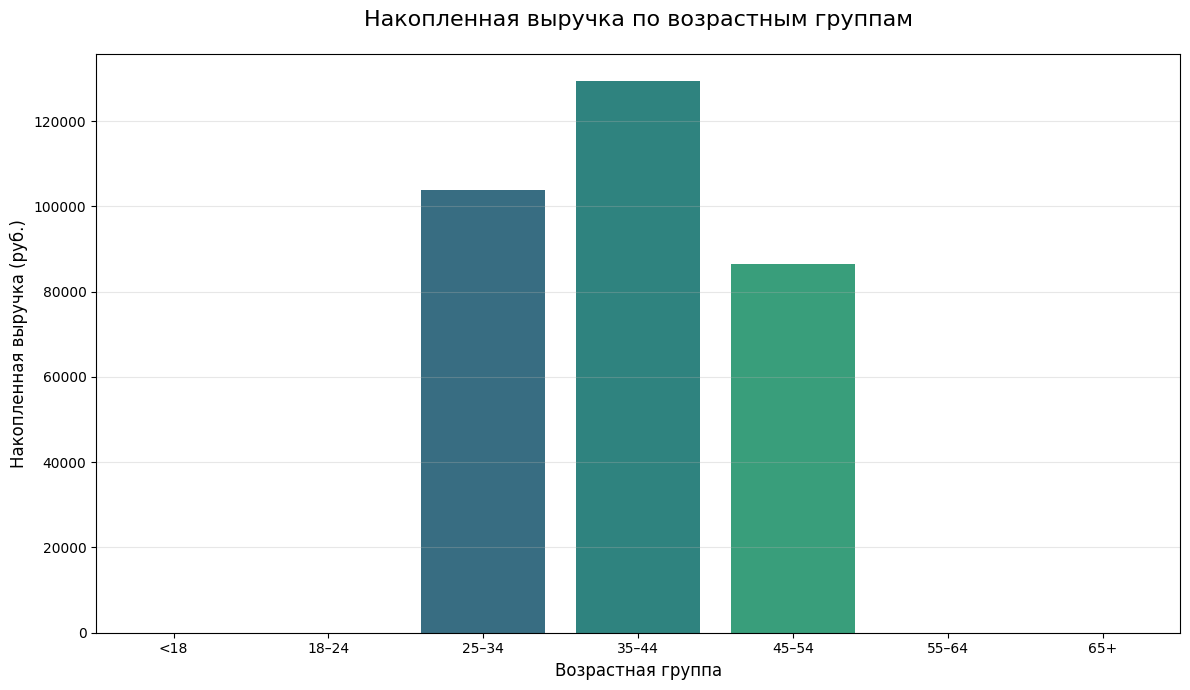

In [44]:
#Визуализация: самая платёжеспособная группа
#График 1. Общая накопленная выручка по группам

plt.figure(figsize=(12, 7))
sns.barplot(
    data=age_analysis.reset_index(),
    x='age_group',
    y='Общая накопленная выручка (руб.)',
    palette='viridis'
)
plt.title('Накопленная выручка по возрастным группам', fontsize=16, pad=20)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Накопленная выручка (руб.)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

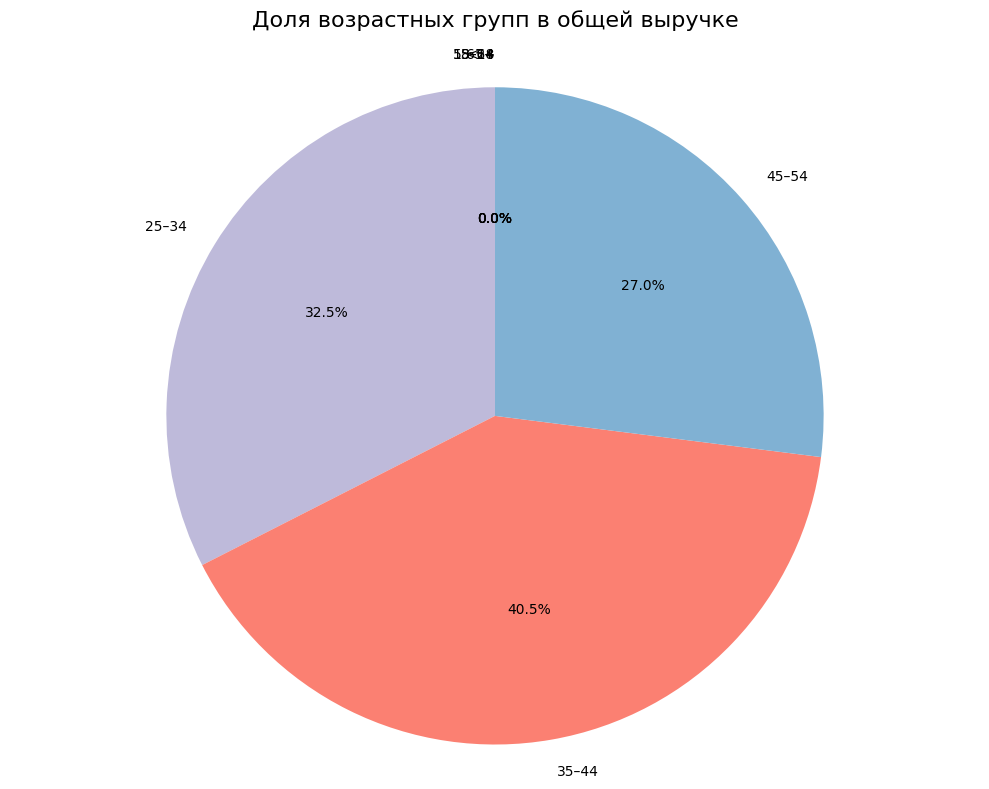

In [45]:
#График 2. Доля в общей выручке (круговая диаграмма)

plt.figure(figsize=(10, 8))
plt.pie(
    age_analysis['Доля в выручке (%)'],
    labels=age_analysis.index,
    autopct='%1.1f%%',
    colors=plt.cm.Set3.colors,
    startangle=90
)
plt.title('Доля возрастных групп в общей выручке', fontsize=16, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [46]:
# Определение самой платёжеспособной группы

# Группа с максимальной накопленной выручкой
top_group = age_analysis[
    age_analysis['Общая накопленная выручка (руб.)'] == age_analysis['Общая накопленная выручка (руб.)'].max()
].index[0]

print(f"\nСамая платёжеспособная группа: {top_group}")
print(f"Вклад в выручку: {age_analysis.loc[top_group, 'Доля в выручке (%)']}%")
print(f"Средняя месячная выручка: {age_analysis.loc[top_group, 'Средняя месячная выручка (руб.)']} руб.")


Самая платёжеспособная группа: 35–44
Вклад в выручку: 40.5%
Средняя месячная выручка: 12.52 руб.


In [47]:
# посмотреть зависимость типа тарифа от группы возраста пользователя

In [48]:
# Распределение типов подписок по возрастным группам
# Таблица частот: количество пользователей по возрасту и типу подписки
pivot_counts = pd.crosstab(
    df['age_group'],
    df['subscriptionType'],
    margins=True,  # итоговые суммы
    margins_name='Всего'
)

print("Распределение типов подписок по возрастным группам (количество пользователей):")
print(pivot_counts)

Распределение типов подписок по возрастным группам (количество пользователей):
subscriptionType  basic  premium  standard  Всего
age_group                                        
25–34               320      253       238    811
35–44               402      286       327   1015
45–54               277      194       203    674
Всего               999      733       768   2500


In [49]:
#Доля каждого тарифа внутри возрастной группы (в %)
pivot_percent = pd.crosstab(
    df['age_group'],
    df['subscriptionType'],
    normalize='index'  # нормализация по строке (по группе)
) * 100

print("Доля типов подписок в каждой возрастной группе (в %):")
print(pivot_percent.round(1))

Доля типов подписок в каждой возрастной группе (в %):
subscriptionType  basic  premium  standard
age_group                                 
25–34              39.5     31.2      29.3
35–44              39.6     28.2      32.2
45–54              41.1     28.8      30.1


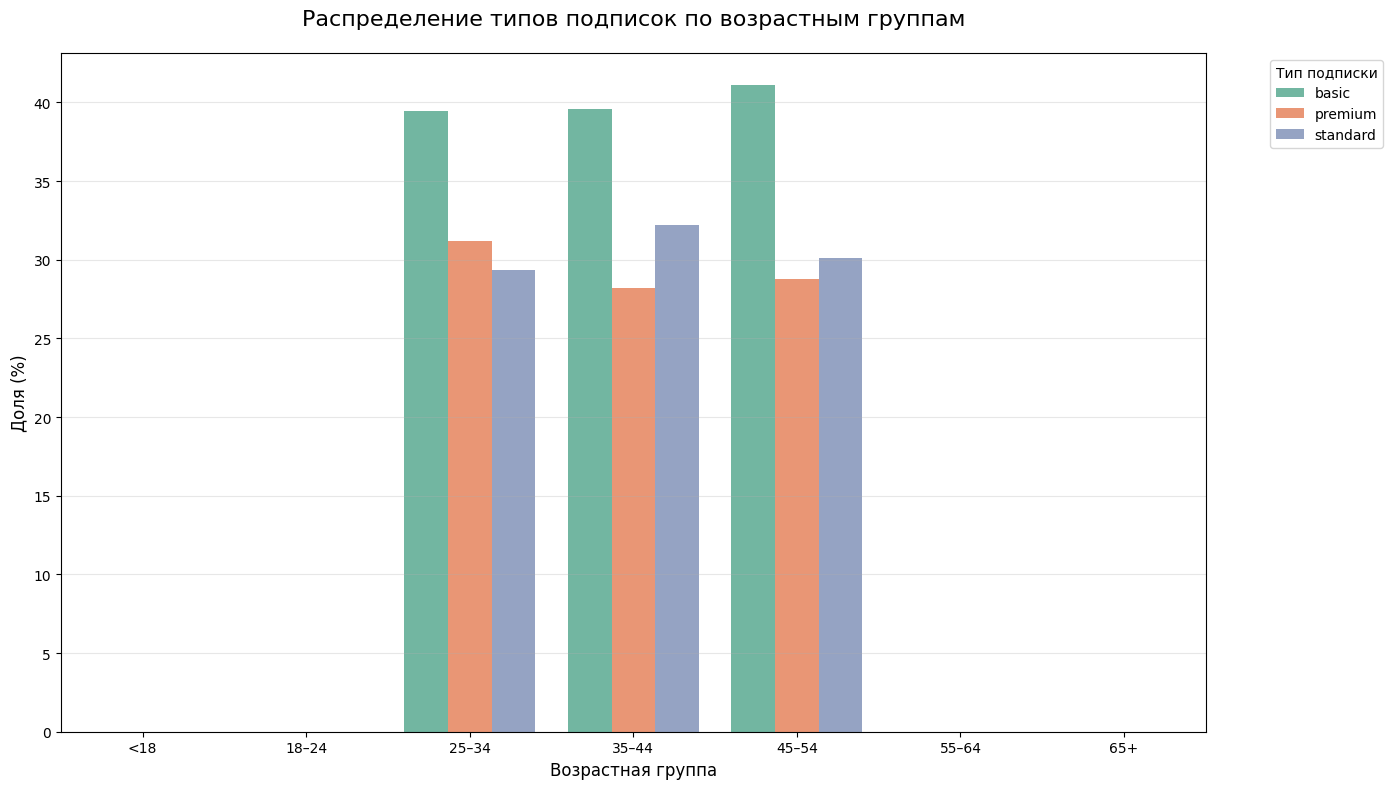

In [50]:
 #Столбчатая диаграмма (доли по группам)

pivot_percent_plot = pivot_percent.reset_index()

pivot_melted = pivot_percent_plot.melt(
    id_vars='age_group',
    var_name='subscriptionType',
    value_name='percent'
)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=pivot_melted,
    x='age_group',
    y='percent',
    hue='subscriptionType',
    palette='Set2'
)
plt.title('Распределение типов подписок по возрастным группам', fontsize=16, pad=20)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Доля (%)', fontsize=12)
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [51]:
# посмотреть зависимость типа тарифа от страны пользователя

In [52]:
#Количество пользователей по странам и типам подписок
top_countries = df['country'].value_counts().head(10).index
df_filtered = df[df['country'].isin(top_countries)]
pivot_counts = pd.crosstab(
    df_filtered['country'],
    df_filtered['subscriptionType'],
    margins=True,
    margins_name='Всего'
)

print("Количество пользователей по странам и типам подписок:")
print(pivot_counts)

Количество пользователей по странам и типам подписок:
subscriptionType  basic  premium  standard  Всего
country                                          
Australia            31      101        51    183
Brazil              146       33         4    183
Canada              145       88        84    317
France               36      147         0    183
Germany             149        3        31    183
Italy               176        4         3    183
Mexico                4        0       179    183
Spain               110      212       129    451
United Kingdom        3        0       180    183
United States       199      145       107    451
Всего               999      733       768   2500


In [53]:
#Доля тарифов в каждой стране (в %)

pivot_percent = pd.crosstab(
    df_filtered['country'],
    df_filtered['subscriptionType'],
    normalize='index'  # по строке (по стране)
) * 100

print("Доля типов подписок в каждой стране (в %):")
print(pivot_percent.round(1))

Доля типов подписок в каждой стране (в %):
subscriptionType  basic  premium  standard
country                                   
Australia          16.9     55.2      27.9
Brazil             79.8     18.0       2.2
Canada             45.7     27.8      26.5
France             19.7     80.3       0.0
Germany            81.4      1.6      16.9
Italy              96.2      2.2       1.6
Mexico              2.2      0.0      97.8
Spain              24.4     47.0      28.6
United Kingdom      1.6      0.0      98.4
United States      44.1     32.2      23.7


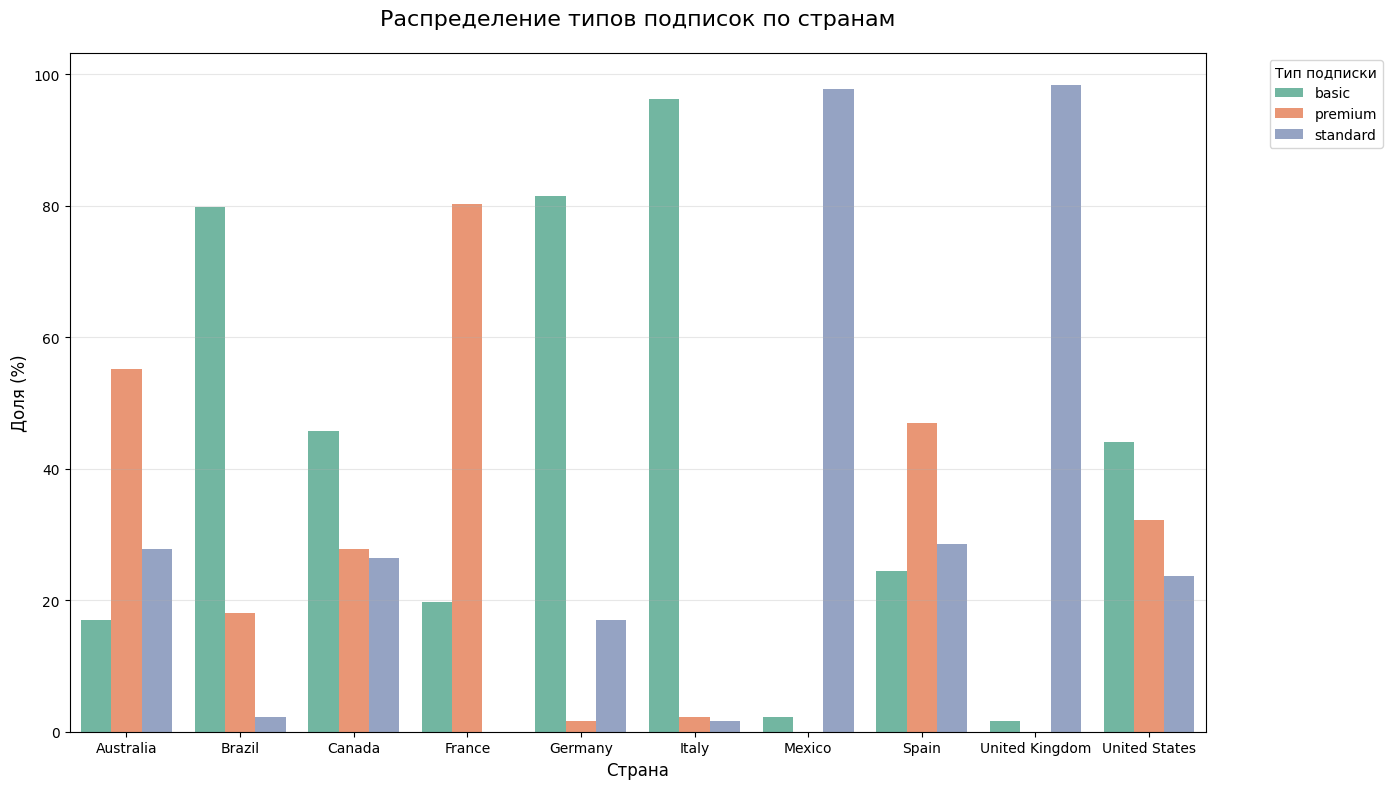

In [54]:
pivot_plot = pivot_percent.reset_index()
pivot_melted = pivot_plot.melt(
    id_vars='country',
    var_name='subscriptionType',
    value_name='percent'
)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=pivot_melted,
    x='country',
    y='percent',
    hue='subscriptionType',
    palette='Set2'
)
plt.title('Распределение типов подписок по странам', fontsize=16, pad=20)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Доля (%)', fontsize=12)
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Выводы

In [55]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

# Выводы
1. Количество уникальных клиентов: 2500
2. Возраст  Основные статистики по возрасту:
Средний возраст: 38.8
Медиана возраста: 39.0
Стандартное отклонение: 7.2
Минимальный возраст: 26.0
Максимальный возраст: 51.0
25-й перцентиль: 32.0
75-й перцентиль: 45.0
Количество пользователей: 2500.0
3. Количество пользователей по полу:
Женский    1257
Мужской    1243
Доли по полу (в %):
Женский    50.3
Мужской    49.7
4. девайсы пользователей
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
5.  Распределение типов подписок:
subscriptionType
Basic       999
Standard    768
Premium     733
6. Распределение пользователей по странам (Топ-10)
country
Spain             451
United States     451
Canada            317
Mexico            183
United Kingdom    183
Brazil            183
France            183
Germany           183
Australia         183
Italy             183
7. Привлечение пользователей

Новые пользователи пришли с мая 2022 по декабрь 2022

8. Выручка

Выручка по месяцам
         месяц    месячная    накопительня
0  2021-09-01       39          39
1  2021-10-01       78         117
2  2021-11-01      124         241
3  2021-12-01      176         417
4  2022-01-01      274         691
5  2022-02-01      336        1027
6  2022-03-01      497        1524
7  2022-04-01      738        2262
8  2022-05-01     1243        3505
9  2022-06-01     4941        8446
10 2022-07-01    10953       19399
11 2022-08-01    15684       35083
12 2022-09-01    20243       55326
13 2022-10-01    26808       82134
14 2022-11-01    30530      112664
15 2022-12-01    30811      143475
16 2023-01-01    30965      174440
17 2023-02-01    31063      205503
18 2023-03-01    31132      236635
19 2023-04-01    31184      267819
20 2023-05-01    31236      299055
21 2023-06-01    31271      330326
22 2023-07-01    20442      350768

Анализ выручки сервиса:
- Общая накопленная выручка: 350,768.00 руб.
- Средняя ежемесячная выручка: 15,250.78 руб.
- Максимальный месяц по выручке: Jun 2023 (31,271.00 руб.)
- Минимальный месяц по выручке: Sep 2021 (39.00 руб.)
- Доля активных пользователей: 0.0% (0/2500)

9.
Анализ платёжеспособности по возрастным группам:
                        Количество          Средняя месячная
    группа       пользователей               выручка (руб.)  \
                                                              
<18                               0                              NaN   
18–24                             0                              NaN   
25–34                           811                            12.54   
35–44                          1015                            12.52   
45–54                           674                            12.46   
55–64                             0                              NaN   
65+                               0                              NaN   

                            Общая                      
age_group          накопленная          Доля в выручке (%)
                           выручка (руб.)                                                
<18                                       0                 0.0  
18–24                                     0                 0.0  
25–34                                103765                32.5  
35–44                                129348                40.5  
45–54                                 86384                27.0  
55–64                                     0                 0.0  
65+                                       0                 0.0  

Самая платёжеспособная группа: 35–44
Вклад в выручку: 40.5%
Средняя месячная выручка: 12.52 руб.

10. Распределение типов подписок по возрастным группам (количество пользователей):
subscriptionType  Basic  Premium  Standard  Всего
age_group                                        
25–34                        320      253       238    811
35–44                        402      286       327   1015
45–54                        277      194       203    674
Всего                        999      733       768   2500

11. Доля типов подписок в каждой возрастной группе (в %):
subscriptionType  Basic  Premium  Standard
age_group                                 
25–34                      39.5     31.2      29.3
35–44                      39.6     28.2      32.2
45–54                      41.1     28.8      30.1

12. Количество пользователей по странам и типам подписок:
subscriptionType  Basic  Premium  Standard  Всего
country                                          
Australia                 31      101        51    183
Brazil                      146       33         4    183
Canada                   145       88        84    317
France                     36      147         0    183
Germany                 149        3        31    183
Italy                         176        4         3    183
Mexico                      4          0       179    183
Spain                        110      212       129    451
United Kingdom       3          0       180    183
United States            199      145       107    451
Всего                        999        733       768   2500

Доля типов подписок в каждой стране (в %):
subscriptionType  Basic  Premium  Standard
country                                   
Australia          16.9     55.2      27.9
Brazil                79.8     18.0       2.2
Canada             45.7     27.8      26.5
France               19.7     80.3       0.0
Germany            81.4      1.6      16.9
Italy                    96.2      2.2       1.6
Mexico                2.2      0.0      97.8
Spain                  24.4     47.0      28.6
United Kingdom   1.6      0.0      98.4
United States      44.1     32.2      23.7